In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential



In [65]:
df = pd.read_csv("NSE-Tata.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [66]:
df.index = df['Date']
print(df)


                  Date    Open    High     Low    Last   Close  \
Date                                                             
2018-10-08  2018-10-08  208.00  222.25  206.85  216.00  215.15   
2018-10-05  2018-10-05  217.00  218.60  205.90  210.25  209.20   
2018-10-04  2018-10-04  223.50  227.80  216.15  217.25  218.20   
2018-10-03  2018-10-03  230.00  237.50  225.75  226.45  227.60   
2018-10-01  2018-10-01  234.55  234.60  221.05  230.30  230.90   
...                ...     ...     ...     ...     ...     ...   
2013-10-14  2013-10-14  160.85  161.45  157.70  159.30  159.45   
2013-10-11  2013-10-11  161.15  163.45  159.00  159.80  160.05   
2013-10-10  2013-10-10  156.00  160.80  155.85  160.30  160.15   
2013-10-09  2013-10-09  155.70  158.20  154.15  155.30  155.55   
2013-10-08  2013-10-08  157.00  157.80  155.20  155.80  155.80   

            Total Trade Quantity  Turnover (Lacs)  
Date                                               
2018-10-08             4642146.0     

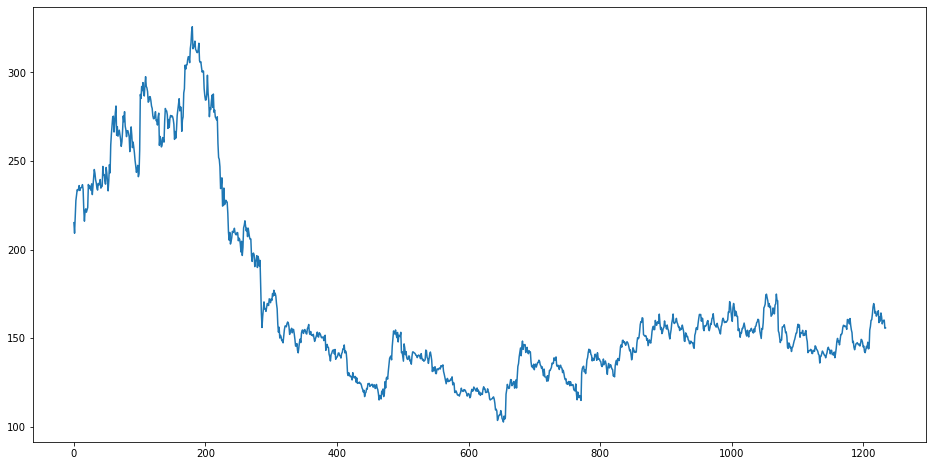

In [29]:
# plt.figure(figsize=(16,8))
# plt.plot(df['Close'], label='Closing Price History')


In [69]:
data=df
data.drop(['Date','Open','High','Low','Last','Total Trade Quantity','Turnover (Lacs)'], axis=1,inplace=True)
print(data.values)

[[215.15]
 [209.2 ]
 [218.2 ]
 ...
 [160.15]
 [155.55]
 [155.8 ]]


In [70]:
scale = MinMaxScaler(feature_range=(0,1))
# scaled_data = scale.fit_transform(final_dataset)

train_data= data.iloc[0:980].values
test_data = data.iloc[980:].values


In [73]:
scaled_train = scale.fit_transform(train_data)

In [74]:
# Create xtrain and y train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(scaled_train[i-60:i,0])
    y_train.append(scaled_train[i,0])


In [75]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [80]:
# build model
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100, batch_size=32)



Epoch 1/100
920/920 [==============================] - 22s 24ms/step - loss: 0.0212
Epoch 2/100
920/920 [==============================] - 18s 20ms/step - loss: 0.0060
Epoch 3/100
920/920 [==============================] - 19s 20ms/step - loss: 0.0050
Epoch 4/100
920/920 [==============================] - 21s 23ms/step - loss: 0.0049
Epoch 5/100
920/920 [==============================] - 29s 32ms/step - loss: 0.0040
Epoch 6/100
920/920 [==============================] - 48s 52ms/step - loss: 0.0042
Epoch 7/100
920/920 [==============================] - 106s 116ms/step - loss: 0.0037
Epoch 8/100
920/920 [==============================] - 26s 28ms/step - loss: 0.0039
Epoch 9/100
920/920 [==============================] - 25s 27ms/step - loss: 0.0036
Epoch 10/100
920/920 [==============================] - 25s 27ms/step - loss: 0.0039
Epoch 11/100
920/920 [==============================] - 25s 27ms/step - loss: 0.0039
Epoch 12/100
920/920 [==============================] - 24s 26ms/step -

In [81]:
inputs = data[len(data)-len(test_data)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scale.transform(inputs)


In [82]:
# Lets create test data
x_test = []
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test= np.array(x_test)

In [84]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# Make prediction and back transform it to the initial state
predicted_price = scale.inverse_transform(model.predict(x_test))


In [86]:
# print(predicted_price)

In [87]:
# Save model
model.save("lstm_stock.h5")